# Finding the Best Two Markets to Advertise In

In this project , we will try to find two best market to advertise in, we're  working with surveys dataset  from e-learning website.

we will analyzing existing dataset about new coders to find best market and considering to answer many question to stengthen the analysis
1. Where are these new coders located.
2. What are the locations with the greatest number of new coders.
3. How much money new coders are willing to spend on learning.

## Understanding the data

To reach the goal, we should organize for a couple of diferent markets to find out which would the best choice for advertising. However, it will very costly and to avoid that, we can use better option with using an existing dataset from freeCodeCamp

In 2017, FreeCodeCamp (free e-learning patform that offers courses on web development)  release a [dataset](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/README.md) contain survey about new coders with their field of interest such as web development, data science, game development, etc. FreeCodeCamp also have at least 150000 users in their [website](https://www.freecodecamp.org/forum/u?period=all) hich is ideal for our purpose

Below, we will do quick explore '2017-fCC-New-Coders-Survey-Data.csv' from their [github repository](https://github.com/freeCodeCamp/2017-new-coder-survey)


In [1]:
#read in the data
import pandas as pd

survey_data_2017 = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0) # low_memory = False to silence dtypes warning

#quick exploration from the data
print(survey_data_2017.shape)
survey_data_2017.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the data have over than 15000 rows, where every rows represent every survey input and 136 columns, contain many infromation from survey.

## Checking for Sample Representativity

After quick analyze, we find that most of the course that offered by FreeCodeCamp are on web and mobil development, also cover many other field, for instance, data science, game development, design, and etc.

Because our purpose to find two best market for advertisement, we choose population of new coders that are interested in the subject and consider questions such as:
1. Where are these new coders located.
2. What are the locations with the greatest number of new coders.
3. How much money new coders are willing to spend on learning.

we also can consider other columns such as Age, School degree and major, job, gender and etc. But for simplicity, we will focus on coders interest and 3 questions above

In [2]:
#check the coder interest
survey_data_2017['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

there are many information from above data, such as
1. most of corespondence insert web developer as their choice
2. only 1 percent corespondence are interest only in mobile developer
3. although freeCoderCamp main course are web and mobile developer, there are few corespondence choose another interest such as Data science, mobile developer, information security, etc

It's is also interesting that - from quick view - most of correspondence choose more than 1 role. Below we will investigate that abd find percent frequency of people who choose one interest and choose mixed interest

In [3]:
#check the data

#split the columns contain role job and find number of frequency

data_copy = survey_data_2017['JobRoleInterest'].copy()

#drop null values from jobrole columns
interest_no_null = data_copy.dropna()

#split the data
split_interest = interest_no_null.str.split(',')

#fin number of interest
n_of_interest = split_interest.apply(lambda x : len(x))

#value_counts
n_of_interest.value_counts(normalize=True) *100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

it's look like 31.6 percent of coresponce find their true interest, when other still have mixed number. FreeCodeCamps offer multiple course in their website. So, although most of the corespondence choose more than 1 field,the data still representative for our analysis

FreeCodeCamps main course are about web and mobile development, investigate wheteher corespondence choose at leats one of the subject in main course can give us more picture about our goal

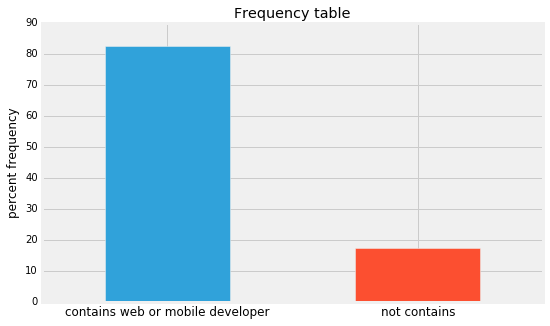

In [4]:
# find if mobile or web developer in the jobrole columns
web_mobile_is_there = interest_no_null.str.contains('Mobile Developer | Web Developer')

#value counts to kow number and percent of table
freq_table = web_mobile_is_there.value_counts(normalize=True) * 100 

#create bar plot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
% matplotlib inline 


freq_table.plot.bar(rot=0, title= 'Frequency table', figsize=(8,5))
plt.ylabel('percent frequency')
plt.xticks([0,1], ['contains web or mobile developer', 'not contains'], size=12)

plt.show()


we can see in the bar graph above that at least 80 percent corespondence choose web developer or mobile as their interest, this result follow the reality that freecodecamps main offer course in the field of web and mobile development

## New Coders - Locations and Densities

We found out that the sample has the right categories of people for our purpose. It's mean that we can start the analysis.

in the beginning of the project we make three question for strengthen the analysis to find two best market for advertise in. There are:

1. Where are these new coders located.
2. What are the locations with the greatest number of new coders.
3. How much money new coders are willing to spend on learning.

In this section, we will focus on first and second question






The data set provides infromation about location of each respondence in two columns:

1. 'Countrycitizen', which describes the country origin of respondence
2. 'CountryLive', variables describes what country each respondence lives in

to find the best market depends on the country level, we should consider about the location (country) of respondence when the corespondence click the ads  or fill out the survey, so ''CountryLive' column is the best choice

with 'countrylive' column we will try to make frequency depends on country, set the data, and choose the two highest frequency

In [5]:
# to make sure we work with a representative sample,
# we will drop the row where participants didn't answer what 
# role or field they are intersted in

data_no_null = survey_data_2017[survey_data_2017['JobRoleInterest'].notnull()].copy()

#make frequency table

freq_table = pd.DataFrame()
freq_table['absolute frequency'] = data_no_null['CountryLive'].value_counts()
freq_table['relative frequency'] = data_no_null['CountryLive'].value_counts(normalize=True) * 100

freq_table

,absolute frequency,relative frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


from the frequency above, we can tell that depends on the country, USA have they highest potential market with 45 percent corespondence come from USA and India have the second highest frequency.

but, if we see more clearly, India and England(in the third) and other country except USA have less diffeent(indicate the country have similarity) To make clear which data are the two best country, we need to go  more in depth and consider other columns

## Spending Money for Learning

In this section, we will continue the analysis by answer the third question:

How much money new coders are willing to spend on learning.



column which contain information about question above is 'MoneyForLearning column'. This column describes amount of money (in American Dollars) spent by corespondence from the moment they completed the survey.

to get more picture about two best market, we will try to find how much money each corespondence especially student spends per month using the 'MoneyForLearning' columns

In [6]:
# to find how much money student spends for month, we can
# divide 'MoneyForlearning' columns and 'MonthsProgramming' columns
# but with many corespondence input 0 in 'Monthsprogramming'column
# we should replace all values of 0 with 1
data_no_null['MonthsProgramming'].replace(0,1, inplace=True)

# divide 'MoneyForlearning' columns with 'MonthsProgramming' columns
data_no_null['spends_per_month'] = data_no_null['MoneyForLearning'] / data_no_null['MonthsProgramming']

#check null values
data_no_null['spends_per_month'].isnull().sum()

675

data have many null values, let's remove the rows contain null values in 'spend per month' columns

In [7]:
data_no_null = data_no_null[data_no_null['spends_per_month'].notnull()]


before continue, we also remove null values in 'countrylive' columns

In [8]:
data_no_null = data_no_null[data_no_null['CountryLive'].notnull()]
data_no_null['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

for the rest of project we will focus on 4 highest country(usa, India, UK and Canada), there are 2 reasons behind that:
1. There are have the highest absolute frequency in sample
2. if we will make course in english, 4 country above have the highest potential, because english is an official language in that country. the better our chances to target the right people with our ads.

to know how many 'spends per month' i will group it on country using  groupby and calculate mean spends in every country

In [9]:
data_group = data_no_null.groupby('CountryLive').mean()

data_group['spends_per_month'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: spends_per_month, dtype: float64

from the data above, we can see that USA and India have the highest spends_per_month, but if we focus on UK, Uk have low amount of money than data from frequency. to know more about that issue,  we will investigate more deeply to see if that data is right or there was outliers between the data

## Dealing with Extreme Outliers

create box plot for 4 country, to find outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



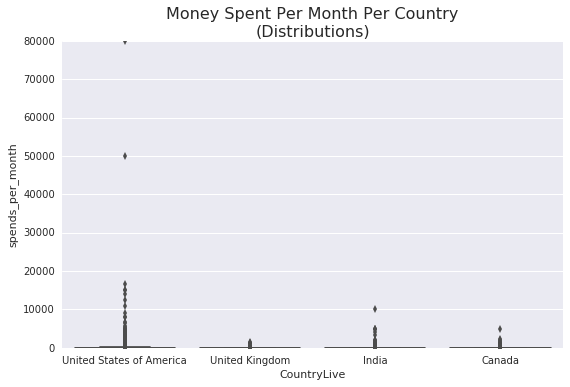

In [10]:
#isolate data only show 4 countrys
data_4_countrys = data_no_null[data_no_null['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

#import seaborn library
import seaborn as sns

#check outlier using boxplot
sns.boxplot(x='CountryLive', y='spends_per_month', data=data_4_countrys)

plt.title('Money Spent Per Month Per Country\n(Distributions)',fontsize = 16)

plt.show()

it's hard to see, with many ouliers in picture above, lets remove the outliers

In [11]:
data_without_outliers = data_4_countrys[data_4_countrys['spends_per_month'] < 15000]

check mean of data, depends on country

In [12]:
data_without_outliers.groupby('CountryLive').mean()['spends_per_month']


CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    168.050360
Name: spends_per_month, dtype: float64

we can see that, there was no different with before ouliers, let's check outliers again

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



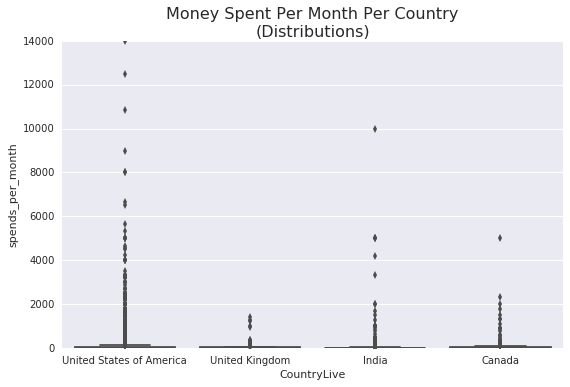

In [13]:
sns.boxplot(x='CountryLive', y='spends_per_month', data=data_without_outliers)

plt.title('Money Spent Per Month Per Country\n(Distributions)',fontsize = 16)


plt.show()

extreme ouliers still occur in the data. 

to solve this problem, we will look more deeply with check the outliers to find unlogical data

### India Outliers

In [14]:
#first focus india, 
#check data with more than 2000

india_outliers = data_without_outliers[(data_without_outliers['CountryLive'] == 'India') & (data_without_outliers['spends_per_month'] >= 2000)]

In [15]:
india_outliers.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spends_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
9410,38.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2000.000000


'attendedBootcamp' columns have zero whether the corespondence spends more than 2000 dollar, this condition make non sense and it is caused by some mistake, such as corespondence input tuition fee or their salary than amount of money they spends for bootcamp per month, for the next, we can try to remove 'attendedBootcamp' with zero number

In [16]:
#remove the ouliers
data_new = data_without_outliers.drop(india_outliers.index)

### usa outliers

for the usa outliers, we will focus extreme value (6000 and above)

In [17]:
usa_outliers = data_new[(data_new['CountryLive'] == 'United States of America') & (data_new['spends_per_month'] >= 6000)]

usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spends_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


some data have 1 point in 'AttendedBootcamp' column, let's we see other columns

In [18]:
usa_outliers['MonthsProgramming']

718      1.0
1222     2.0
3184     1.0
3930     6.0
7198     5.0
7505     3.0
9778     1.0
16997    1.0
Name: MonthsProgramming, dtype: float64

one again, it is seem unrealitistic if you spend more than 6000 dollars for 1 or 2 month are unrealistic.

so based on what we found above, 2  kind outliers, such as:
1. corespondence who spends more than 6000 dollars per month without attending bootcamps
2. corespondence who only have month programming below 3 month with spends more than 6000 dollars

will be deleted




In [19]:
#delete outliers
#delete > 6000 and bootcamps = 0

usa_outliers_2 = data_new[(data_new['CountryLive'] == 'United States of America') 
                          & (data_new['spends_per_month'] >= 6000) & (data_new['AttendedBootcamp'] == 0.0)]

data_new = data_new.drop(usa_outliers_2.index)

#delete > 6000 and month programming < 3

usa_outliers_3 = data_new[(data_new['CountryLive'] == 'United States of America') 
                          & (data_new['spends_per_month'] >= 6000) & (data_new['MonthsProgramming'] < 3.0)]

data_new = data_new.drop(usa_outliers_3.index)

### Canada outliers

because canada only have one extreme ouliers, we will remove it directly

In [20]:
canada_outliers = data_new[(data_new['CountryLive'] == 'Canada') & (data_new['spends_per_month'] >= 4000)]

#make new data
data_new = data_new.drop(canada_outliers.index)

check the data using boxplot and group mean

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



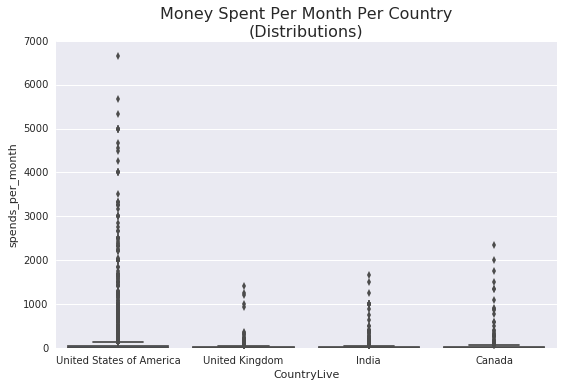

In [21]:
sns.boxplot(x='CountryLive', y='spends_per_month', data=data_new)

#create the title
plt.title('Money Spent Per Month Per Country\n(Distributions)',fontsize = 16)


plt.show()

In [22]:
data_new.groupby('CountryLive').mean()['spends_per_month']

CountryLive
Canada                       93.065400
India                        57.256604
United Kingdom               45.534443
United States of America    144.888094
Name: spends_per_month, dtype: float64

## Choosing the Two Best Markets

considering the result we've found so far, one country we should definitely advertise in is the USA, there are a lot a new coder living in there and they are willing to spends good amount of money per month(144 $).

We will sell the subripsionts at price 59 $ per month, UK doesn't meet our criteria, So Canada and India become two best candidate. We see canada with mean 93 have more potential than India, but we think that we shoul condider number of potential customer

In [28]:
#number potential customer

data_new['CountryLive'].value_counts(normalize=True)*100



United States of America    75.012840
India                       11.684643
United Kingdom               7.164869
Canada                       6.137648
Name: CountryLive, dtype: float64

we found that, although india have less mean than canada, they have  higher number potential customer than canada, more customer mean more benefit, so we think India should become second best market after USA

apart from the result, we have several options can be taken:
1. it is make sense if we advertise more two country, for example we can advertise in USA , India and Canada. My reason is, - although canada have lowest number of potential customer, at least the customers are willing to spends more money than India. For UK, we will not include it, eventhough UK have more potential customer, it is because mean of 'money per month' below our subscriptions plan.

2. we can split advertising budget equally or unequally.
    there are many combinations we can use if we split bidget equally depends on mean 'spends per month'
    1. 60% for the USA, 25% for India, 15% for Canada.
    2. 50% for the USA, 30% for India, 20% for Canada; etc.
    
 for split unequally, we can choose USA and India (if depends on potential customer) or USA and Canada (depends on mean 'spends per month'). For example:
    1. 70 % for the USA and 30 % for India
    2. 75 % for the USA and 25 % for Canada, etc
    
3. We also can choose only USA for our advertising strategy because if we in both potential customer and 'spends per month' USA have high different with other country, or 75 % potential customer came from USA.

at this point, we probably send this result to advertising team and let them use domain knowledge to take best decision


## Conclusion

in this project we analyzed survey data from FreeCodecamps to find two best market for advertise in. It is clear that USA have highest potential market.
 
for the second, it is unlear between India and Canada, there are several reason. But, at this point, we can send this analyze to market team and let them analyze more deeply, to find best potential.